In [36]:
import sys
import pandas as pd
sys.path.append("C:/Users/ping/MyDrive/py_files/python/py379/")
from myUtils import pickle_load, pickle_dump
pd.set_option('max_colwidth', 12, 'display.max_columns', 18, 'display.width', 1200, 'display.max_rows', 100)
INPUT_DIR = 'C:/Users/ping/OneDrive/Documents/jenn_bb_sales'
path_pickle_dump = f'{INPUT_DIR}/'

In [37]:
df = pickle_load(path_pickle_dump, 'df_item_sale_n_weather_cleaned')
rows_org, cols_org = df.shape[0], df.shape[1]
print(f'df.shape: {df.shape}, rows: {rows_org}, columns: {cols_org}')
print(f'df.columns: {df.columns}')

df.shape: (18364, 23), rows: 18364, columns: 23
df.columns: Index(['Date', 'Time', 'Category', 'Item', 'Qty', 'Gross Sales', 'Discounts', 'Net Sales', 'Tax', 'Transaction ID', 'Event Type', 'Dining Option', 'Customer Name', 'NAME', 'AWND', 'PRCP', 'TAVG', 'TMAX', 'TMIN', 'WT01', 'WT02', 'WT08', 'DOW'], dtype='object')


In [38]:
cols_drop = ['NAME', 'AWND', 'PRCP', 'TAVG', 'TMAX', 'TMIN', 'WT01', 'WT02', 'WT08', 'DOW']
df.drop(cols_drop, axis=1, inplace=True)
print(f'df.columns: {df.columns}')
_rows_dropped, _cols_dropped = (rows_org - df.shape[0]), (cols_org - df.shape[1])
print(f'df.shape: {df.shape}, rows dropped from original: {_rows_dropped}, columns dropped from original: {_cols_dropped}')

df.columns: Index(['Date', 'Time', 'Category', 'Item', 'Qty', 'Gross Sales', 'Discounts', 'Net Sales', 'Tax', 'Transaction ID', 'Event Type', 'Dining Option', 'Customer Name'], dtype='object')
df.shape: (18364, 13), rows dropped from original: 0, columns dropped from original: 10


In [39]:
df = df[df['Event Type'] != 'Refund']
df = df[df['Qty'] >= 0]
df = df.sort_values(['Date', 'Time'])
_rows_dropped, _cols_dropped = (rows_org - df.shape[0]), (cols_org - df.shape[1])
print(f'df.shape: {df.shape}, rows dropped from original: {_rows_dropped}, columns dropped from original: {_cols_dropped}')

df.shape: (18337, 13), rows dropped from original: 27, columns dropped from original: 10


In [40]:
df

,Date,Time,Category,Item,Qty,Gross Sales,Discounts,Net Sales,Tax,Transaction ID,Event Type,Dining Option,Customer Name
0,2021-07-08,17:31:07,Food,Chocolat...,1.0,6.0,0.0,6.0,0.00,5Qzw7N4E...,Payment,To Go,Jennifer...
1,2021-07-08,17:31:29,Food,Jarred P...,1.0,6.0,0.0,6.0,0.00,Z4Lhlkfm...,Payment,For Here,Jennifer...
2,2021-07-08,17:31:47,Beverage,Sparkling,1.0,3.0,0.0,3.0,0.28,Zxzxigke...,Payment,For Here,Jennifer...
6,2021-07-09,09:14:03,Food,Croissant,2.0,10.0,0.0,10.0,0.00,Jwogqfj8...,Payment,For Here,Mayumi N...
7,2021-07-09,09:14:03,Food,Chocolat...,2.0,12.0,0.0,12.0,0.00,Jwogqfj8...,Payment,For Here,Mayumi N...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18359,2022-09-04,11:19:02,Food,Cinnamon...,1.0,3.0,0.0,3.0,0.00,Lmk3E9Gx...,Payment,For Here,Aubrie D...
18360,2022-09-04,11:20:38,Food,Oatmeal ...,1.0,4.0,0.0,4.0,0.00,Hokel420...,Payment,For Here,Jean Sequen
18361,2022-09-04,11:21:25,Food,Cinnamon...,1.0,3.0,0.0,3.0,0.00,Huikykv6...,Payment,For Here,NaN
18362,2022-09-04,11:32:24,Food,Cinnamon...,1.0,3.0,0.0,3.0,0.00,Zdb6Eyob...,Payment,For Here,Yesenia ...


In [41]:
df.columns

Index(['Date', 'Time', 'Category', 'Item', 'Qty', 'Gross Sales', 'Discounts', 'Net Sales', 'Tax', 'Transaction ID', 'Event Type', 'Dining Option', 'Customer Name'], dtype='object')

In [49]:
# _cols = ['Transaction ID', 'Date', 'Time', 'Category', 'Item', 'Qty', 'Gross Sales']
_cols = ['Transaction ID', 'Qty', 'Gross Sales']
df1 = df[_cols]
pd.set_option('max_colwidth', 30) 
df1

,Transaction ID,Qty,Gross Sales
0,5Qzw7N4Epco9Ezmhvubnjawev,1.0,6.0
1,Z4Lhlkfmd1Wueqp2Etutjvvev,1.0,6.0
2,Zxzxigkeb6Nw6Ytwrgrdzweev,1.0,3.0
6,Jwogqfj8U01Abzqlchlrplsev,2.0,10.0
7,Jwogqfj8U01Abzqlchlrplsev,2.0,12.0
...,...,...,...
18359,Lmk3E9Gxitmoh4U6C8Qec55Ev,1.0,3.0
18360,Hokel4207Mxfkjwl16Mu6N6Ev,1.0,4.0
18361,Huikykv6Itvipng8Cmty6F5Ev,1.0,3.0
18362,Zdb6Eyob4Zx1Lu8Jgxfstf6Ev,1.0,3.0


In [53]:
# https://towardsdatascience.com/pandas-groupby-a-simple-but-detailed-tutorial-314b8f37005d
# https://towardsdatascience.com/accessing-data-in-a-multiindex-dataframe-in-pandas-569e8767201d
# sales_by_TransID = df1.groupby(['Transaction ID', 'Date', 'Time', 'Category', 'Item']).agg(['sum'])
_df = df1.groupby(['Transaction ID']).agg(['sum'])
# _df['Avg Sales'] = _df['Gross Sales sum'] / _df['Qty sum']
_df
# sales_by_TransID[Avg Sales] = 

,Qty,Gross Sales
,sum,sum
Transaction ID,,
10A3Zthxt5C8Wwohzfshfuafv,1.0,4.0
10Q330Bjqybaaqjvwioiyguev,2.0,11.0
10Svenrwjhbinkriazypkqlev,3.0,14.0
10Yq32Boj7Usp1Icomcjqbfev,2.0,11.0
123Gfeumdrgp0Vg6Xiwlj4Gev,5.0,26.0
...,...,...
Zzfbmslhyfykicycewhanaafv,3.0,21.0
Zzkr8Kcprkww9Kf5Yxymh52Ev,4.0,24.0


In [58]:
_df['Avg Sales'] = _df.loc[:, 'Gross Sales'] / _df.loc[:, 'Qty']
_df

,Qty,Gross Sales,Avg Sales
,sum,sum,
Transaction ID,,,
10A3Zthxt5C8Wwohzfshfuafv,1.0,4.0,4.000000
10Q330Bjqybaaqjvwioiyguev,2.0,11.0,5.500000
10Svenrwjhbinkriazypkqlev,3.0,14.0,4.666667
10Yq32Boj7Usp1Icomcjqbfev,2.0,11.0,5.500000
123Gfeumdrgp0Vg6Xiwlj4Gev,5.0,26.0,5.200000
...,...,...,...
Zzfbmslhyfykicycewhanaafv,3.0,21.0,7.000000
Zzkr8Kcprkww9Kf5Yxymh52Ev,4.0,24.0,6.000000


In [60]:
%matplotlib inline

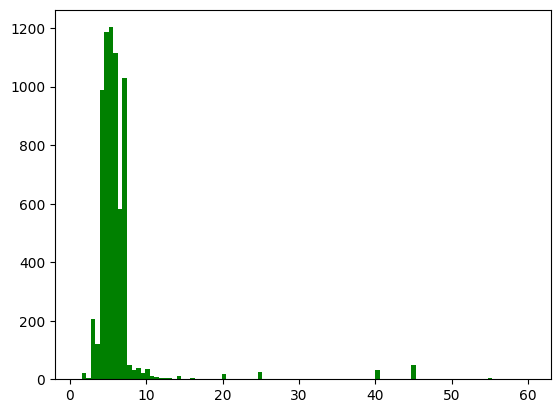

In [98]:
# https://matplotlib.org/stable/gallery/pyplots/pyplot_text.html#sphx-glr-gallery-pyplots-pyplot-text-py
import numpy as np
import matplotlib.pyplot as plt
x = _df['Avg Sales']
# n, bins, patches = plt.hist(x, 100, density=False, facecolor='g', alpha=0.75)
# n, bins, patches = plt.hist(x, 100, density=False, facecolor='g')
n, bins, patches = plt.hist(x, 100, density=False, facecolor='g')


<AxesSubplot:>

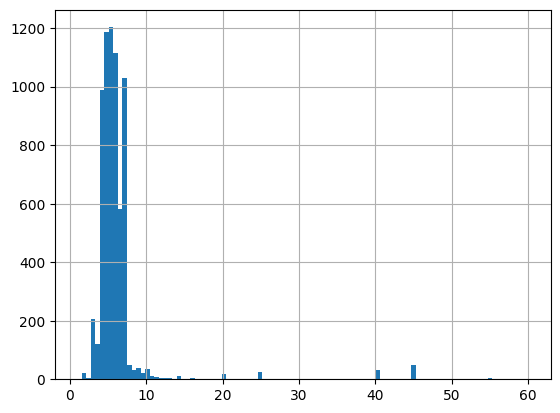

In [77]:
# https://medium.com/@melishadevkota/histograms-and-scatter-plots-using-jupyter-notebook-d577eb850350
_df['Avg Sales'].hist(bins=100)

array([[<AxesSubplot:title={'center':'sum'}>]], dtype=object)

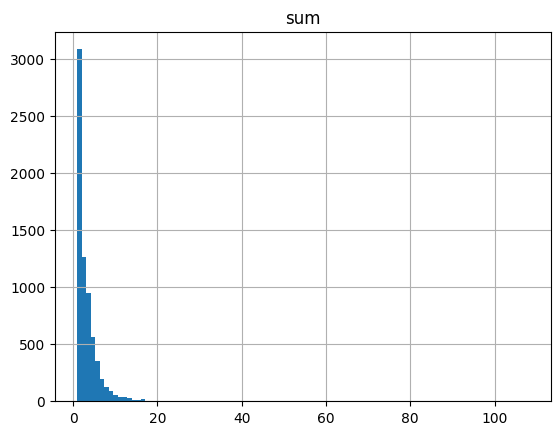

In [71]:
_df['Qty'].hist(bins=100)

In [54]:
_df.columns

MultiIndex([(        'Qty', 'sum'),
            ('Gross Sales', 'sum')],
           )

In [46]:
df.loc[df['Transaction ID'] == 'Zzr3Jodrbwor705Px6Flj9Sev']

,Date,Time,Category,Item,Qty,Gross Sales,Discounts,Net Sales,Tax,Transaction ID,Event Type,Dining Option,Customer Name
10337,2022-03-04,09:10:37,Food,Twice Baked,1.0,7.0,0.0,7.0,0.0,Zzr3Jodrbwor705Px6Flj9Sev,Payment,For Here,Nicholas Delozier
10338,2022-03-04,09:10:37,Food,Danish,1.0,7.0,0.0,7.0,0.0,Zzr3Jodrbwor705Px6Flj9Sev,Payment,For Here,Nicholas Delozier
10339,2022-03-04,09:10:37,Food,Cinnamon Knot,1.0,3.0,0.0,3.0,0.0,Zzr3Jodrbwor705Px6Flj9Sev,Payment,For Here,Nicholas Delozier


In [ ]:
sales_by_TransID.tail(30)

In [ ]:
df1.columns


In [ ]:
df1.tail(30)

In [ ]:
_cols = ['Transaction ID', 'Date', 'Time', 'Category', 'Qty', 'Gross Sales']
df1 = df1[_cols]
df1

In [ ]:
# # https://datagy.io/pandas-groupby/
# for column in df.columns[2::]: # skip columns: Date, Time
#   s = df[column]
#   grouped = s.groupby(s)
#   print(f'{column}')
#   print('='*20)
#   _dict = {}
#   for key in grouped.groups.keys():
#     _count = grouped.get_group(key).count()
#     _dict[key] = _count
  
#   # sort items and counts in the column in reverse order 
#   _dict = dict(sorted(_dict.items(), reverse = True, key=lambda item: item[1]))
#   for k, v in _dict.items():
#       print(f'{k:<45}{v:10,.0f}')
#   print('='*20, '\n')

In [ ]:
# # how many rows have one or more valid inputs in columns: WT01, WT02, WT08'
# _df = df[['WT01', 'WT02', 'WT08']]
# _idx = _df.index[_df.notnull().any(axis=1)]
# _df_notnull = _df.iloc[_idx]
# print(f'{_df_notnull.shape[0]} rows have one or more valid inputs in columns: WT01, WT02, WT08')
# print(f'_df_notnull.shape: {_df_notnull.shape}')